In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# 📥 Load & Prepare the Dataset
# ===============================
df = pd.read_csv('../data/sample_sales.csv')

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Add revenue and profit columns
df['revenue'] = df['price'] * df['quantity']
df['profit'] = (df['price'] - df['cost_price']) * df['quantity']


In [14]:
print("📊 Dataset Overview:")
print(df.info())

📊 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      5000 non-null   int64         
 1   date          5000 non-null   datetime64[ns]
 2   category      5000 non-null   object        
 3   product_name  5000 non-null   object        
 4   quantity      5000 non-null   int64         
 5   price         5000 non-null   float64       
 6   cost_price    5000 non-null   float64       
 7   revenue       5000 non-null   float64       
 8   profit        5000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 351.7+ KB
None


In [24]:
# ===============================
# 🧾 Dataset Overview
# ===============================
print("📊 Dataset Overview:")
print(df.info())

print("\n🔢 Statistical Summary:")
print(df.describe())

print("\n🧮 Null Values:")
print(df.isnull().sum())

📊 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       2000 non-null   object        
 1   order_id      2000 non-null   object        
 2   date          2000 non-null   datetime64[ns]
 3   category      2000 non-null   object        
 4   product_id    2000 non-null   object        
 5   product_name  2000 non-null   object        
 6   quantity      2000 non-null   int64         
 7   price         2000 non-null   float64       
 8   cost_price    2000 non-null   float64       
 9   revenue       2000 non-null   float64       
 10  profit        2000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 172.0+ KB
None

🔢 Statistical Summary:
                                date     quantity        price   cost_price  \
count                           

C:\Users\himan\AppData\Local\Temp\ipykernel_38908\3020593000.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\himan\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


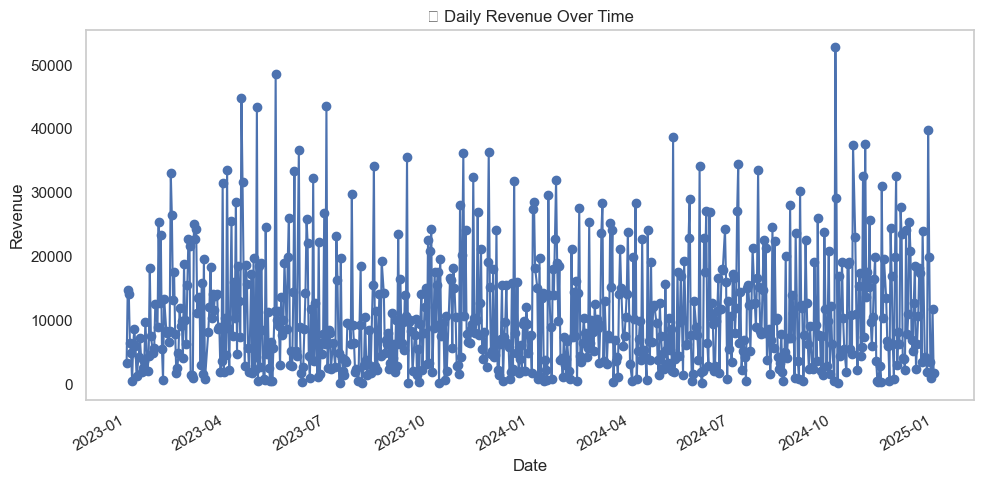

In [25]:
# ===============================
# 📈 Daily Revenue Over Time
# ===============================
daily_sales = df.groupby('date')['revenue'].sum()

plt.figure(figsize=(10, 5))
daily_sales.plot(marker='o')
plt.title('📈 Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\himan\AppData\Local\Temp\ipykernel_38908\726277564.py:12: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\himan\AppData\Local\Temp\ipykernel_38908\726277564.py:12: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\himan\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\himan\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


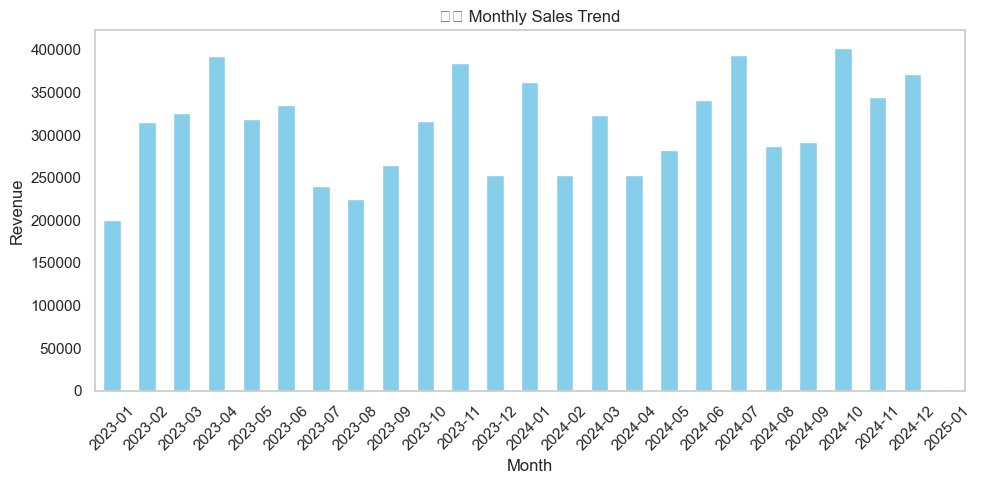

In [26]:
# ===============================
# 🗓️ Monthly Sales Trend
# ===============================
df['month'] = df['date'].dt.to_period('M')
monthly_sales = df.groupby('month')['revenue'].sum()

monthly_sales.plot(kind='bar', figsize=(10, 5), title='🗓️ Monthly Sales Trend', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\himan\AppData\Local\Temp\ipykernel_38908\618169792.py:13: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\himan\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


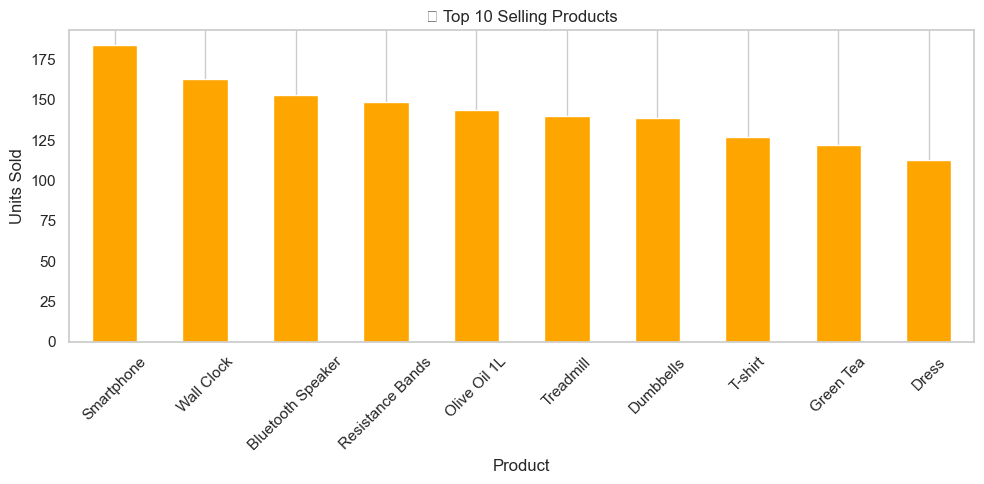

In [27]:
# ===============================
# 🏆 Top 10 Selling Products
# ===============================
top_products = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='orange')
plt.title('🏆 Top 10 Selling Products')
plt.ylabel('Units Sold')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\himan\AppData\Local\Temp\ipykernel_38908\195463340.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\himan\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


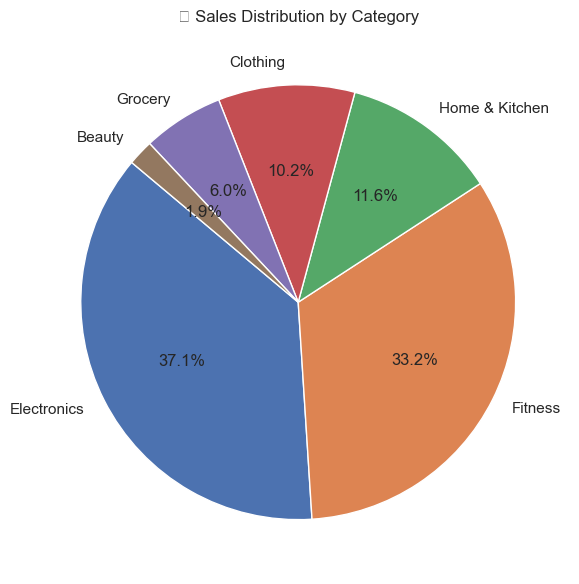

In [28]:
# ===============================
# 🛍️ Sales Distribution by Category
# ===============================
category_sales = df.groupby('category')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('📊 Sales Distribution by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [29]:
# 🧾 Optional: Show category summary as table
category_table = category_sales.reset_index().rename(columns={'revenue': 'Total Revenue'})
print("📋 Category-wise Total Revenue:")
print(category_table)


📋 Category-wise Total Revenue:
         category  Total Revenue
0     Electronics     2777774.98
1         Fitness     2482681.25
2  Home & Kitchen      868365.76
3        Clothing      760263.35
4         Grocery      450548.15
5          Beauty      142902.16


C:\Users\himan\AppData\Local\Temp\ipykernel_38908\1476326504.py:10: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\himan\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\himan\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


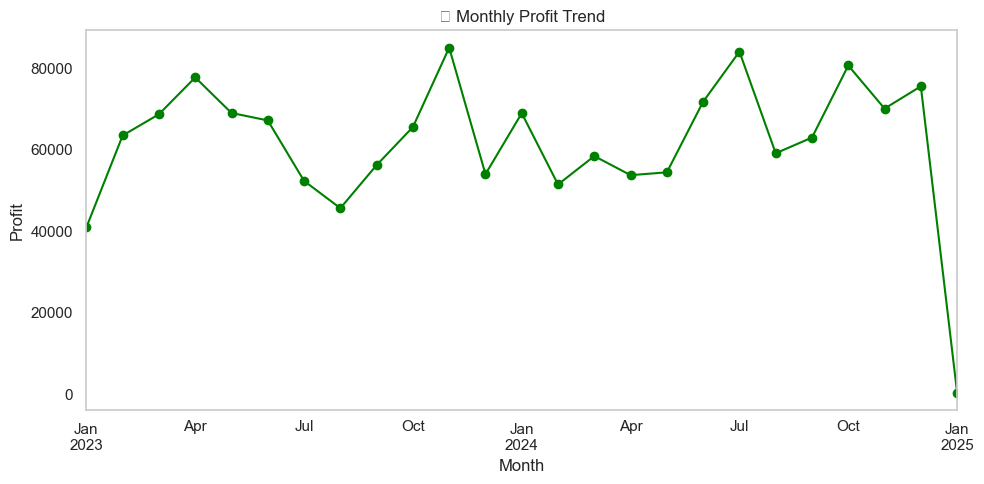

In [30]:
# ===============================
# 💰 Monthly Profit Trend
# ===============================
monthly_profit = df.groupby(df['date'].dt.to_period('M'))['profit'].sum()

monthly_profit.plot(marker='o', color='green', figsize=(10, 5), title='💰 Monthly Profit Trend')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.grid()
plt.tight_layout()
plt.show()